In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
river='St_Clair_R'

location = (42.813370, -82.483370)

### Discharge 

In [3]:
discharge = pd.read_excel('../../measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx', sheet_name='discharge_cms')
for c in discharge.columns:
    discharge = discharge.rename(
        index=str, columns={c: c.lower().strip()})
discharge['date'] = pd.to_datetime(discharge[['year', 'month', 'day']])
discharge = discharge[['date', 'stclair_r']]
discharge['Discharge, cms']  = discharge['stclair_r']
discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028





In [4]:
discharge = discharge.set_index('date')
discharge = discharge['Discharge, cms']


Text(0.5,0,'Year')

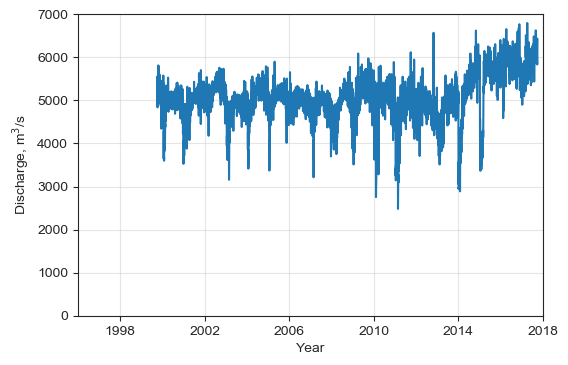

In [5]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(data=discharge,ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


# ax.legend(['({}) - {}'.format(selected_stations.index(site)+1, site)], loc='best', fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

# plt.savefig('One_by_one/Canada/'+river+'/'+river+'_Q.pdf')
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_Q.pdf')

### Concentrations

In [6]:
Port_Lambton = pd.read_excel('../../measurements/ECCC/ST_Clair_River_Concentrations_from_Dabbie.xlsx', sheet_name='Port_Lambton')


Point_Edward = pd.read_excel('../../measurements/ECCC/ST_Clair_River_Concentrations_from_Dabbie.xlsx', sheet_name='Point_Edward')



Point_Edward.head()

Port_Lambton.head()

Port_Lambton['Station'] = 'Port Lambton'
Point_Edward['Station'] = 'Point Edward'


for c in Point_Edward.columns:
    Point_Edward = Point_Edward.rename(index=str, columns={c: c.lower().strip()})

for c in Port_Lambton.columns:
    Port_Lambton = Port_Lambton.rename(index=str, columns={c: c.lower().strip()})

Port_Lambton.columns

Point_Edward.columns

# res.shape

concentrations = pd.concat([Port_Lambton, Point_Edward])
concentrations['tp'] = pd.to_numeric(concentrations['tp'])
concentrations['yyyymmdd'] = pd.to_datetime(concentrations['yyyymmdd'], format='%Y%m%d', errors='coerce')


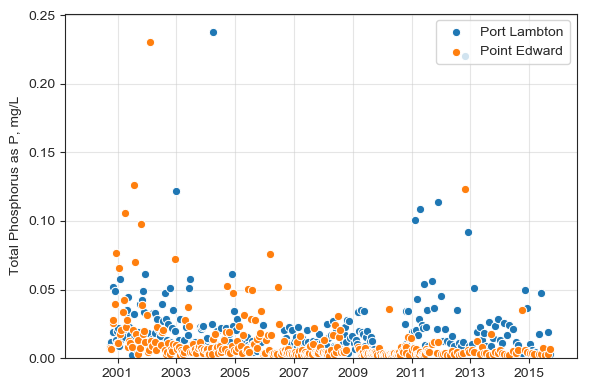

In [7]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(concentrations[concentrations.station=='Port Lambton']['yyyymmdd'], concentrations[concentrations.station=='Port Lambton']['tp'], markers=True, label='Port Lambton')
ax = sns.scatterplot(concentrations[concentrations.station=='Point Edward']['yyyymmdd'], concentrations[concentrations.station=='Point Edward']['tp'], markers=True, label='Point Edward')
ax.legend(loc=1)
plt.ylim(0,None)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
# plt.savefig('One_by_one/Canada/'+river+'/'+river+'_TP.pdf')
# plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_TP.pdf')



In [8]:
concentrations = concentrations.set_index('yyyymmdd')
# concentrations = concentrations[concentrations.station=='Port Lambton']['tp']
concentrations = concentrations['tp']

### EGRET estimates

In [9]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


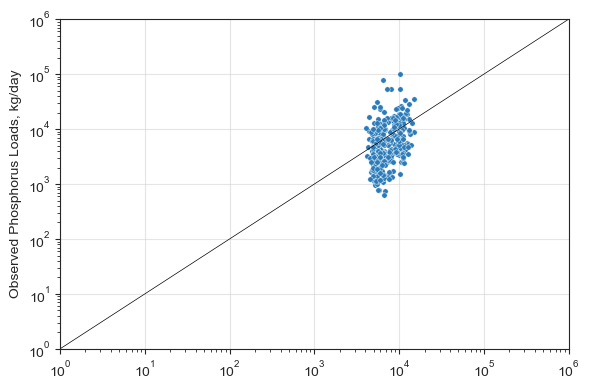

In [10]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,1000000)
plt.ylim(1,1000000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
plt.xlabel("")
plt.tight_layout()



### Meteo Buoys

In [11]:
buoy_14129 = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/buoy_data/buoy_14129.csv')
buoy_45149 = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/buoy_data/buoy_45149.xlsx')



In [12]:
buoy_45149.DATE = pd.to_datetime(buoy_45149.DATE, errors='coerce')
buoy_14129.DATE = pd.to_datetime(buoy_14129.DATE, errors='coerce')


In [13]:
for c in buoy_14129.columns[2:]:
    buoy_14129[c] = pd.to_numeric(buoy_14129[c], errors='coerce')
    buoy_45149[c] = pd.to_numeric(buoy_45149[c], errors='coerce')

In [14]:
buoy_14129.set_index('DATE', inplace=True)
buoy_45149.set_index('DATE', inplace=True)

In [15]:
buoy_45149 = buoy_45149.resample('D', how = 'mean')
buoy_14129 = buoy_14129.resample('D', how = 'mean')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


In [16]:
buoy_45149 = buoy_45149.dropna(axis=1, how='all').dropna()
buoy_14129 = buoy_14129.dropna(axis=1, how='all').dropna()


### Water Level

In [17]:
WL_point_edward = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/water_levels/water_level_t. 11940_PointEdward_1999_2016_timeUTC.csv', skiprows=7)

In [18]:
WL_point_edward
WL_point_edward.Obs_date = pd.to_datetime(WL_point_edward.Obs_date, errors='coerce')

WL_point_edward = WL_point_edward[['Obs_date', 'SLEV(metres)']]


In [19]:
WL_point_edward.set_index('Obs_date', inplace=True)

### Wave data

In [20]:
wd_271 = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/wave_data/ST93271_v01.csv',  header=None)




In [21]:
wd_271[0] = pd.to_datetime(wd_271[0], errors='coerce', format='%Y%m%d%H%M%S')
wd_271 = wd_271.set_index(0)
wd_271 = wd_271.loc['1996-01-01':'2019-01-01']
wd_271 = wd_271.resample('D', how = 'mean').dropna(axis=1, how='all').dropna()


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  after removing the cwd from sys.path.


In [22]:
wd_271.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,,,,,,,,,,,,,,,,,,,,,
1996-01-01,93271.0,43.08,-82.36,3.475000,58.708333,0.105417,0.948333,0.099583,0.370417,4.459167,...,49.833333,13.791667,0.365000,4.553750,4.518333,3.974583,3.669583,3.487083,50.875000,19.125000
1996-01-02,93271.0,43.08,-82.36,7.125000,32.416667,0.267083,1.377917,0.646667,0.965833,6.252500,...,19.125000,19.291667,0.645000,6.517917,6.490417,6.190000,5.971667,5.815000,209.500000,10.875000
1996-01-03,93271.0,43.08,-82.36,8.754167,28.166667,0.348750,1.568333,0.794583,1.214583,5.991250,...,18.000000,20.625000,0.541667,6.868750,6.810417,6.662917,6.509167,6.372083,221.125000,13.666667
1996-01-04,93271.0,43.08,-82.36,3.354167,150.666667,0.104583,0.948750,0.122083,0.483333,5.052917,...,181.250000,12.791667,0.468750,5.052917,4.996250,4.533750,4.261667,4.057083,6.958333,12.833333
1996-01-05,93271.0,43.08,-82.36,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000


## Lake Huron TP

In [23]:
LH = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ML St. Clair/Lake_Huron_GLIP_Lambton.xlsx')

In [24]:
LH = LH[LH.TEST_DESCRIPTION == 'PHOSPHORUS,UNFILTERED TOTAL'][['SAMPLING_DATE', 'VALUE']]

In [25]:
LH.SAMPLING_DATE = pd.to_datetime(LH.SAMPLING_DATE, errors='coerce')

In [26]:
LH.set_index('SAMPLING_DATE', inplace=True)

In [27]:
LH['LH_TP'] = LH['VALUE']
LH = LH['LH_TP']

# AI

In [28]:
df = concentrations.to_frame().join(
    discharge, how='inner').join(
    WL_point_edward, how='inner').join(
    wd_271, how='inner')




In [29]:
df = df[df>0].dropna(axis=1, how='all').dropna()

In [30]:
df.shape

(499, 34)

In [31]:
df['DOY'] = df.index.dayofyear

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)

plt.rcParams['figure.figsize'] = 6, 4

import pandas as pd

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400

import h5py

from datetime import datetime
str(datetime.now())

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


'2019-01-15 10:50:30.201878'

In [33]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, explained_variance_score, accuracy_score
from sklearn import svm

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
df['DOY_sin'] = np.sin(df.DOY/365*2*3.14)
df['DOY_cos'] = np.sin(df.DOY/365*2*3.14)

df['WNDDIR_sin'] = np.sin(df[5]/360*2*3.14)
df['WNDDIR_cos'] = np.cos(df[5]/360*2*3.14)

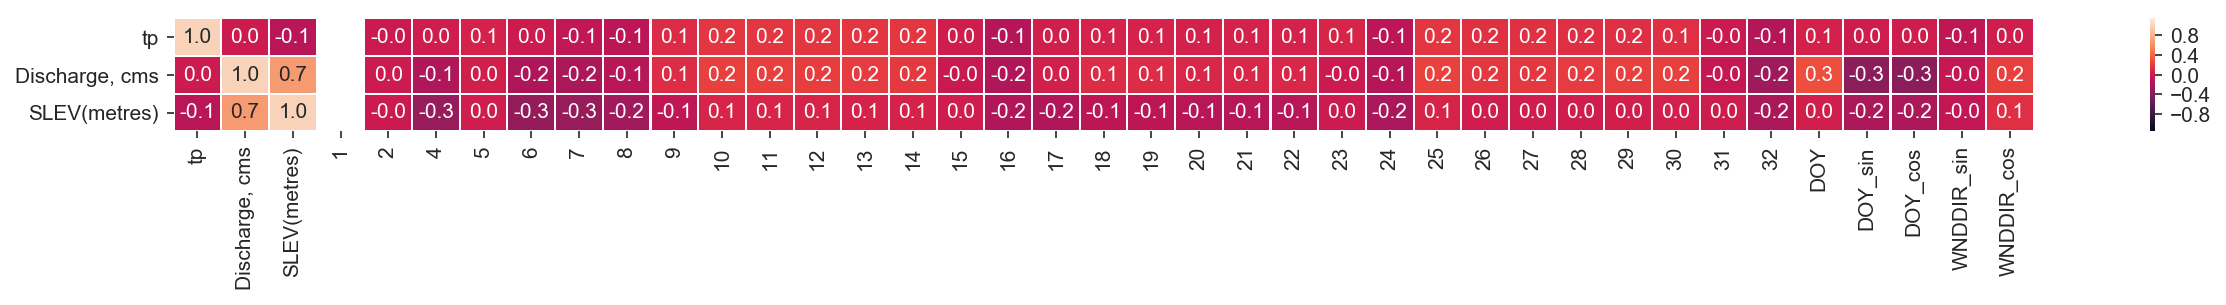

In [35]:
plt.figure(figsize=(20,1),dpi=150)
sns.heatmap(df.corr()[0:3], vmin=-1.15, vmax=1.15,  annot=True, linewidths=.5, fmt= '.1f')
# plt.tight_layout()
# plt.savefig('correlations.png', dpi=90)

In [36]:
X = df.values[::, 1:]

In [37]:
y = df.values[::, 0]

In [38]:
['Discharge, cms'
'SLEV(metres)'
'DOY',
'DOY_sin',
'DOY_cos',
'WNDDIR_sin']

['Discharge, cmsSLEV(metres)DOY', 'DOY_sin', 'DOY_cos', 'WNDDIR_sin']

In [39]:
features = list(df.columns[1:])
target = [df.columns[0]]

In [54]:
features = ['Discharge, cms',
'SLEV(metres)',
'DOY',
'DOY_sin',
'DOY_cos',
'WNDDIR_sin',
'WNDDIR_cos']

In [55]:
from sklearn.cross_validation import train_test_split

In [71]:
train = df.sample(frac=0.99)
test = df.loc[~df.index.isin(train.index)]

In [72]:
def pc_bias(s, o):
    """
    Percent Bias
    input:
        s: simulated
        o: observed
    output:
        pc_bias: percent bias
    """
    return np.mean(100.0 * sum(s - o) / sum(o))

In [73]:
metrics = [mean_squared_error, r2_score, median_absolute_error, explained_variance_score, pc_bias]

In [74]:
models = []
models.append(RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6))
models.append(linear_model.Ridge())
models.append(linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.LassoCV(alphas=[0.1, 1.0, 10.0], positive=True))
models.append(linear_model.ElasticNetCV(alphas=[0.1, 1.0, 10.0]))
models.append(linear_model.Lars())
models.append(linear_model.LassoLarsCV())
models.append(linear_model.Lasso(positive=True))
models.append(linear_model.OrthogonalMatchingPursuitCV())
models.append(linear_model.BayesianRidge())
models.append(linear_model.ElasticNet(positive=True))
# models.append(linear_model.LinearRegression())
models.append(linear_model.HuberRegressor())

RandomForestRegressor method score: 0.6740627881521677
mean_squared_error : 0.00019219158837699074
r2_score : 0.26624164015135854
median_absolute_error : 0.004728174404761908
explained_variance_score : 0.2663694804061173
pc_bias : 1.0687308226891226


<Figure size 900x900 with 0 Axes>

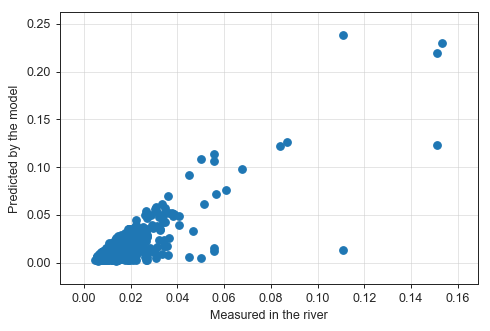

Ridge method score: 0.032698055451474195
mean_squared_error : 0.000570377638407627
r2_score : -31.9848658245875
median_absolute_error : 0.008934673933212539
explained_variance_score : -31.9848658245875
pc_bias : -8.035749303936291e-13


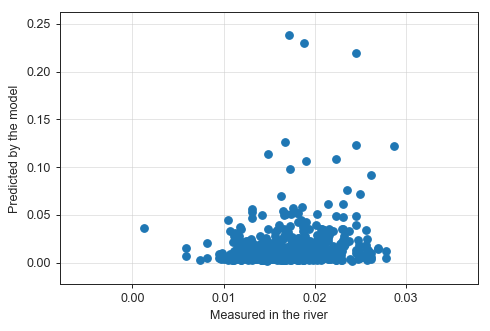

RidgeCV method score: 0.03269805545225157
mean_squared_error : 0.0005703776384071686
r2_score : -31.984865820927396
median_absolute_error : 0.00893467394659539
explained_variance_score : -31.984865820927396
pc_bias : 1.5007553569228215e-12


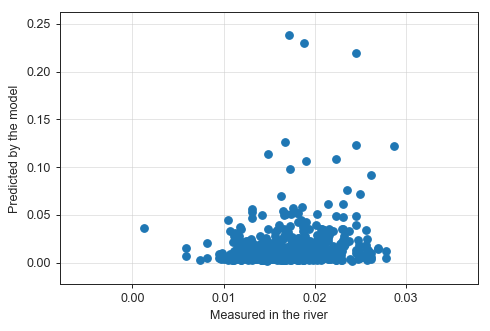

LassoCV method score: 0.0
mean_squared_error : 0.0005896583188136176
r2_score : -1.2246724145539498e+31
median_absolute_error : 0.010222064777327938
explained_variance_score : -1.2246724145539498e+31
pc_bias : 1.0787800720757143e-14


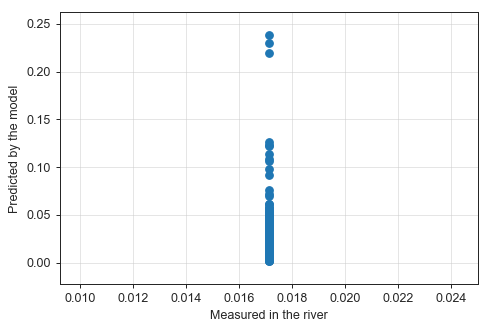

ElasticNetCV method score: 0.0
mean_squared_error : 0.0005896583188136176
r2_score : -1.2246724145539498e+31
median_absolute_error : 0.010222064777327938
explained_variance_score : -1.2246724145539498e+31
pc_bias : 1.0787800720757143e-14


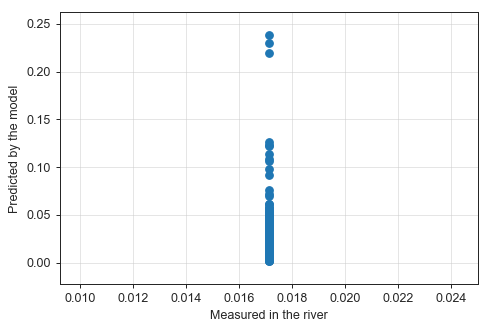

Lars method score: 0.032289703576666495
mean_squared_error : 0.0005706184264876105
r2_score : -36.86328791093278
median_absolute_error : 0.009182057102034968
explained_variance_score : -36.86328791093278
pc_bias : -1.735795492945929e-13


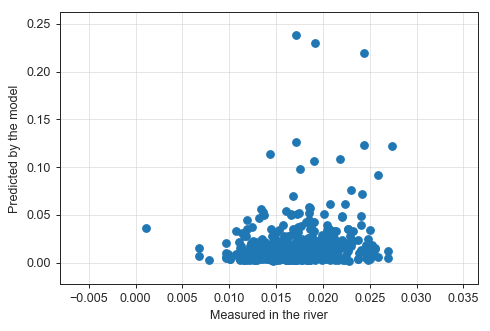

LassoLarsCV method score: 0.005201292565244042
mean_squared_error : 0.0005865913333839381
r2_score : -1278.7638601714389
median_absolute_error : 0.01012215211310337
explained_variance_score : -1278.763860171439
pc_bias : -2.870937855419352e-14


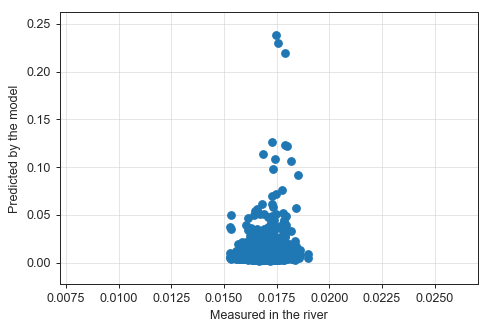

Lasso method score: 0.0
mean_squared_error : 0.0005896583188136176
r2_score : -1.2246724145539498e+31
median_absolute_error : 0.010222064777327938
explained_variance_score : -1.2246724145539498e+31
pc_bias : 1.0787800720757143e-14


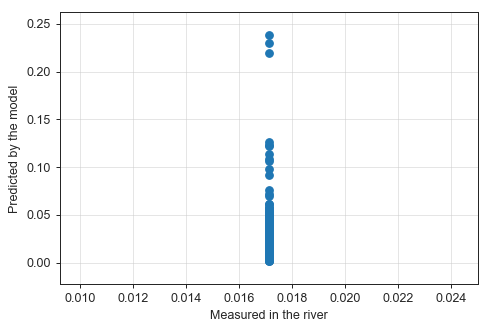

OrthogonalMatchingPursuitCV method score: 0.011495739049106168
mean_squared_error : 0.0005828797606524016
r2_score : -84.98875259158498
median_absolute_error : 0.009450465842313618
explained_variance_score : -84.98875259158498
pc_bias : -1.012624082651469e-12


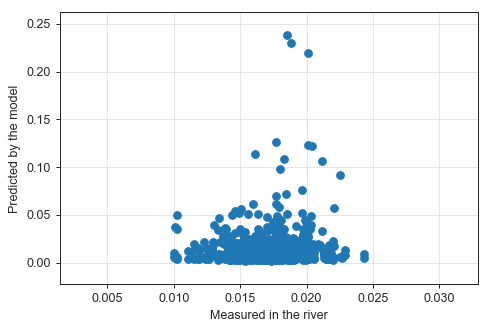

BayesianRidge method score: 0.01327780245446819
mean_squared_error : 0.0005818289521407766
r2_score : -172.45867949979342
median_absolute_error : 0.009845909729566126
explained_variance_score : -172.45867949979342
pc_bias : 2.4981186709881415e-13


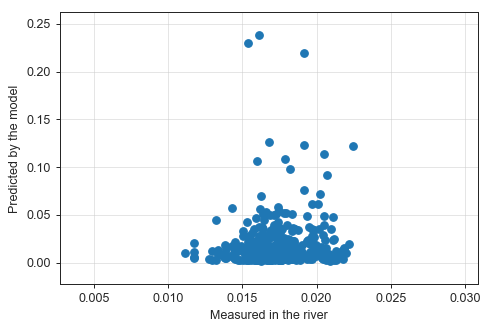

ElasticNet method score: 0.0
mean_squared_error : 0.0005896583188136176
r2_score : -1.2246724145539498e+31
median_absolute_error : 0.010222064777327938
explained_variance_score : -1.2246724145539498e+31
pc_bias : 1.0787800720757143e-14


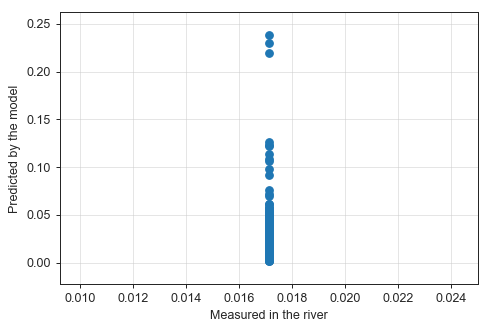

HuberRegressor method score: -0.04134874168643954
mean_squared_error : 0.0006140399483215022
r2_score : -332.57530279187165
median_absolute_error : 0.006543993676450129
explained_variance_score : -315.9269188337494
pc_bias : -32.331903558433716


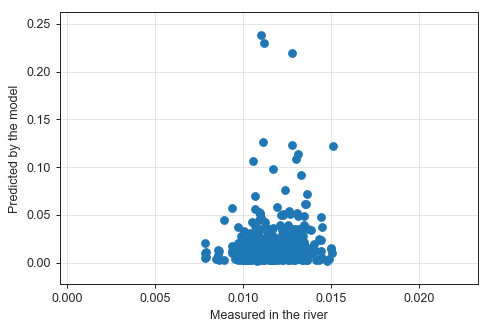

In [81]:
predicted_results = np.empty((len(models),len(train[target].values),))
results = {}
plt.figure(figsize=(10, 10)) 
for i,model in enumerate(models):
    name = str(model).split('(')[0]
    results[name] = {}
    model.fit(train[features], train[target])
    results[name] = {'score': model.score(train[features], train[target]), 'model':name}
    print(str(model).split('(')[0], 'method score:', results[name]['score'])
    
    for m in metrics:
        results[name][m.__name__] = m(model.predict(train[features]), train[target].values)
        print(m.__name__,':', results[name][m.__name__])
    predicted_results[i,:] = model.predict(train[features]).flatten()
    plt.figure()
#     sns.boxplot(x=train[target].values.flatten(), y=model.predict(train[features]).flatten())
    plt.scatter(model.predict(train[features]), train[target].values)
#     plt.ylim(0,10)
    plt.ylabel('Predicted by the model')
    plt.xlabel('Measured in the river')
    # plt.xlim(0,10)
    plt.grid(alpha=0.5)
#     plt.ylim(-1,11)
#     plt.xlim(-1,11)
    plt.show()
    

In [82]:
res_pd_reg = pd.DataFrame(results).transpose()

In [83]:
res_dict=results

In [84]:
res_pd_reg.sort_values(['score'], ascending=0)

,explained_variance_score,mean_squared_error,median_absolute_error,model,pc_bias,r2_score,score
RandomForestRegressor,0.266369,0.000192192,0.00472817,RandomForestRegressor,1.06873,0.266242,0.674063
RidgeCV,-31.9849,0.000570378,0.00893467,RidgeCV,1.50076e-12,-31.9849,0.0326981
Ridge,-31.9849,0.000570378,0.00893467,Ridge,-8.03575e-13,-31.9849,0.0326981
Lars,-36.8633,0.000570618,0.00918206,Lars,-1.7358e-13,-36.8633,0.0322897
BayesianRidge,-172.459,0.000581829,0.00984591,BayesianRidge,2.49812e-13,-172.459,0.0132778
OrthogonalMatchingPursuitCV,-84.9888,0.00058288,0.00945047,OrthogonalMatchingPursuitCV,-1.01262e-12,-84.9888,0.0114957
LassoLarsCV,-1278.76,0.000586591,0.0101222,LassoLarsCV,-2.87094e-14,-1278.76,0.00520129
LassoCV,-1.22467e+31,0.000589658,0.0102221,LassoCV,1.07878e-14,-1.22467e+31,0
ElasticNetCV,-1.22467e+31,0.000589658,0.0102221,ElasticNetCV,1.07878e-14,-1.22467e+31,0
Lasso,-1.22467e+31,0.000589658,0.0102221,Lasso,1.07878e-14,-1.22467e+31,0


In [64]:
{f:v for f,v in zip(features, models[0].feature_importances_)}

{'Discharge, cms': 0.11728781924579616,
 'SLEV(metres)': 0.1494015643648339,
 'DOY': 0.21233919869464918,
 'DOY_sin': 0.1156883154384818,
 'DOY_cos': 0.11688879605904054,
 'WNDDIR_sin': 0.14692097950715127,
 'WNDDIR_cos': 0.14147332669004706}

In [65]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import NuSVC
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    BernoulliNB(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    LabelPropagation(),
    LabelSpreading(),
    LinearDiscriminantAnalysis(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    MLPClassifier(),
    NearestCentroid(),
    RandomForestClassifier(n_estimators=1000, min_samples_leaf=1, random_state=1, n_jobs=6),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SVC(),
    GradientBoostingClassifier(),
    LinearSVC(),
    LogisticRegression(),
    LogisticRegressionCV(),
    SGDClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    MLPClassifier(),
    RandomForestClassifier(),
    RidgeClassifierCV(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    ExtraTreesClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
]

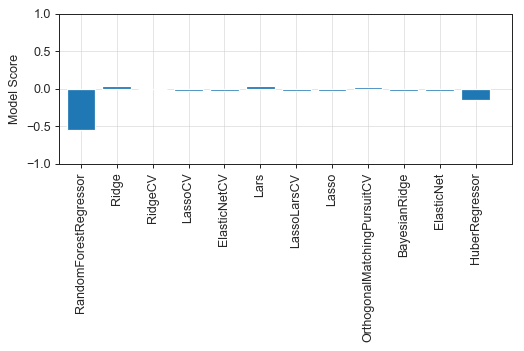

In [66]:
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(res_pd_reg.index,res_pd_reg['score'])
plt.ylabel('Model Score')
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.xlim(-0.6,12)
plt.ylim(-1.,1.)
plt.tight_layout()
# plt.savefig('models_perform.png', dpi=90)
plt.show()

In [67]:
tp
Discharge, cms
VCAR
VTPK
VTP$
WDIR
WSPD
GSPD
ATMS
SSTP


SyntaxError: invalid syntax (<ipython-input-67-c49383b3cc5e>, line 5)

In [ ]:
df.corr()['tp']

In [ ]:
df[4]